# **Data Visualization Lab**


In this notebook, we will be focusing on the visualization of data.

The data set will be presented in the form of a RDBMS.

Therefore, we will have to use SQL queries to extract the data.

## Objectives


In this notebook, we will perform the following:

Visualize the distribution of data.

Visualize the relationship between two features.

Visualize composition of data.

Visualize comparison of data.

<hr>


## Demo: How to work with database


Firstly, download and connect the database file.


In [17]:
import urllib.request
import sqlite3

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'
destination = 'm4_survey_data.sqlite'

urllib.request.urlretrieve(url, destination)

conn = sqlite3.connect(destination)

Then, importing pandas module.


In [19]:
import pandas as pd

In [20]:
# printing how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [22]:
# printing all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Describing a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

## Visualizing distribution of data


### Histograms


Plotting a histogram of `ConvertedComp.`


Text(0.5, 0, 'Annual USD')

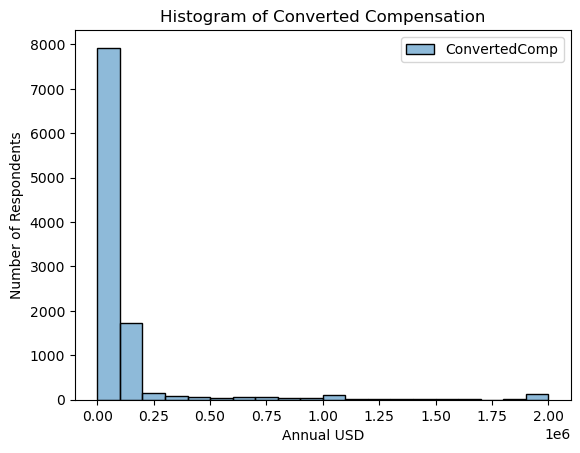

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

QUERY = """ Select ConvertedComp from master """

df_hist = pd.read_sql_query(QUERY,conn)

df_hist.dropna(subset=['ConvertedComp'], inplace=True)

sns.histplot(df_hist, kde=False, bins=20)

plt.title('Histogram of Converted Compensation')
# add y-label
plt.ylabel('Number of Respondents')
# add x-label
plt.xlabel('Annual USD')


### Box Plots


Plotting a box plot of `Age.`


Text(0.5, 0, 'Age')

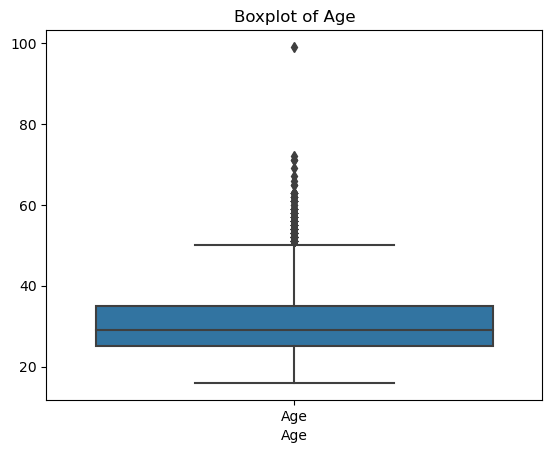

In [27]:
QUERY = """ Select Age from master """

df_box = pd.read_sql_query(QUERY,conn)
df_box.dropna(subset=['Age'], inplace=True)

sns.boxplot(df_box)

plt.title('Boxplot of Age')
plt.xlabel('Age')



## Visualizing relationships in data


### Scatter Plots


Creating a scatter plot of `Age` and `WorkWeekHrs.`


        Age  WorkWeekHrs
0      22.0         80.0
1      23.0         32.0
2      28.0         40.0
3      26.0         40.0
4      29.0         45.0
...     ...          ...
11393  36.0         40.0
11394  25.0         40.0
11395  34.0         40.0
11396  25.0         42.5
11397  30.0         80.0

[11398 rows x 2 columns]


<Axes: xlabel='Age', ylabel='WorkWeekHrs'>

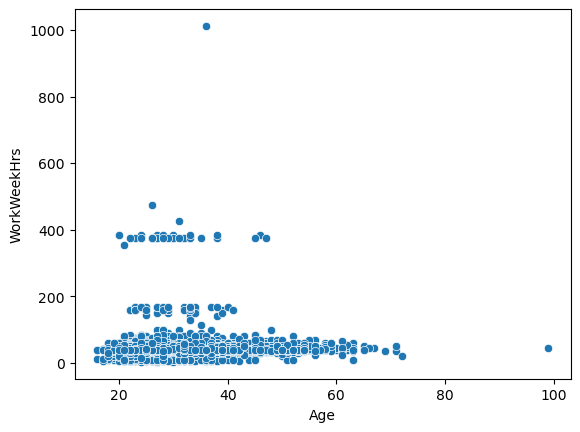

In [28]:
QUERY = """ Select Age, WorkWeekHrs from master """

df_scatter = pd.read_sql_query(QUERY,conn)
print(df_scatter)
sns.scatterplot(data = df_scatter, x = 'Age', y = 'WorkWeekHrs')

### Bubble Plots


Creating a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


        Age  WorkWeekHrs  CodeRevHrs
0      22.0         80.0         NaN
1      23.0         32.0        12.0
2      28.0         40.0         5.0
3      26.0         40.0         NaN
4      29.0         45.0         5.0
...     ...          ...         ...
11393  36.0         40.0         NaN
11394  25.0         40.0         5.0
11395  34.0         40.0         5.0
11396  25.0         42.5         2.0
11397  30.0         80.0         1.0

[11398 rows x 3 columns]


<Axes: xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

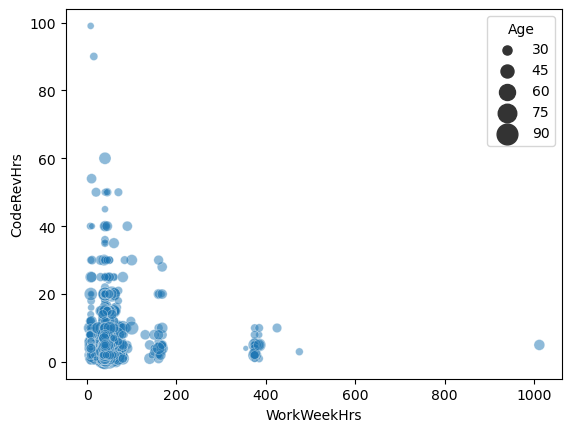

In [29]:
QUERY = """ Select Age, WorkWeekHrs, CodeRevHrs from master """

df_bubble= pd.read_sql_query(QUERY,conn)
print(df_bubble)
sns.scatterplot(data = df_bubble, x ='WorkWeekHrs' , y = 'CodeRevHrs', size = 'Age',alpha = 0.5, sizes=(1, 250))


## Visualizing composition of data


### Pie Charts


Now we create a pie chart of the top 5 databases that respondents wish to learn next year.
 Let's label the pie chart with database names and display percentages of each database on the pie chart.


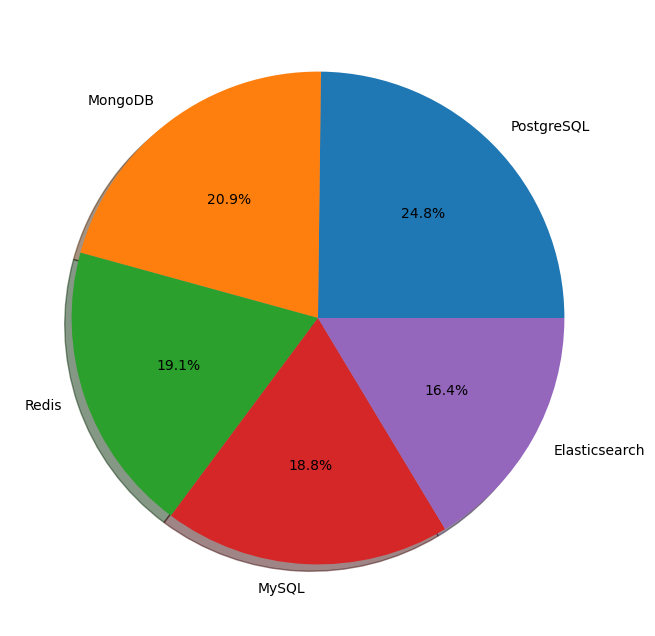

In [30]:
QUERY = """ 
Select *, COUNT(*) AS count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY count DESC
LIMIT 5
 """

df_pie = pd.read_sql_query(QUERY,conn)
data = df_pie['count']
labels = df_pie['DatabaseDesireNextYear']
plt.rcParams['figure.figsize'] = [8,8]

fig, ax = plt.subplots()
ax.pie(data, labels = labels, autopct='%1.1f%%', shadow = True)
plt.show()

### Stacked Charts


Creating a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


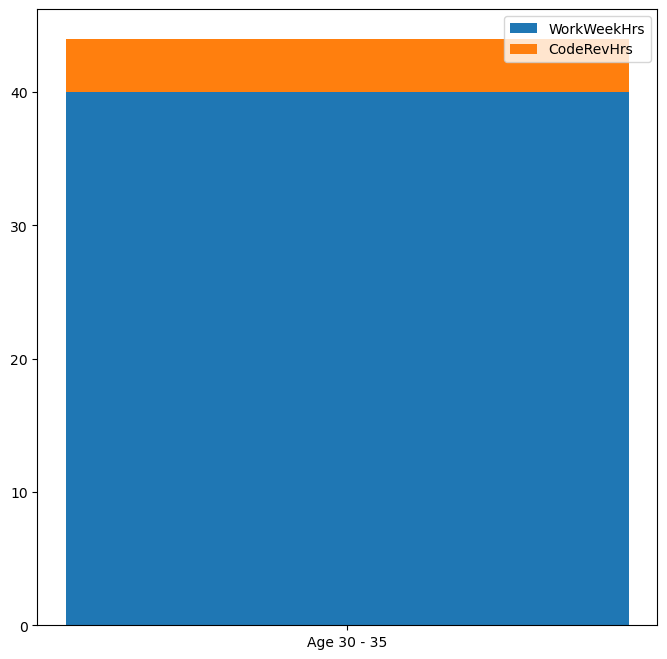

In [29]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 30 AND 35

"""
df_stack = pd.read_sql_query(QUERY,conn)

work_week = df_stack['WorkWeekHrs'].quantile(0.5)
code_rev = df_stack['CodeRevHrs'].quantile(0.5)


plt.rcParams['figure.figsize'] = [8,8]

fig, ax = plt.subplots()

ax.bar('Age 30 - 35', work_week, label='WorkWeekHrs')
ax.bar('Age 30 - 35', code_rev, bottom=work_week, label='CodeRevHrs')
ax.legend()

plt.show()

## Visualizing comparison of data


### Line Chart


We plot the median `ConvertedComp` for all ages from 45 to 60.


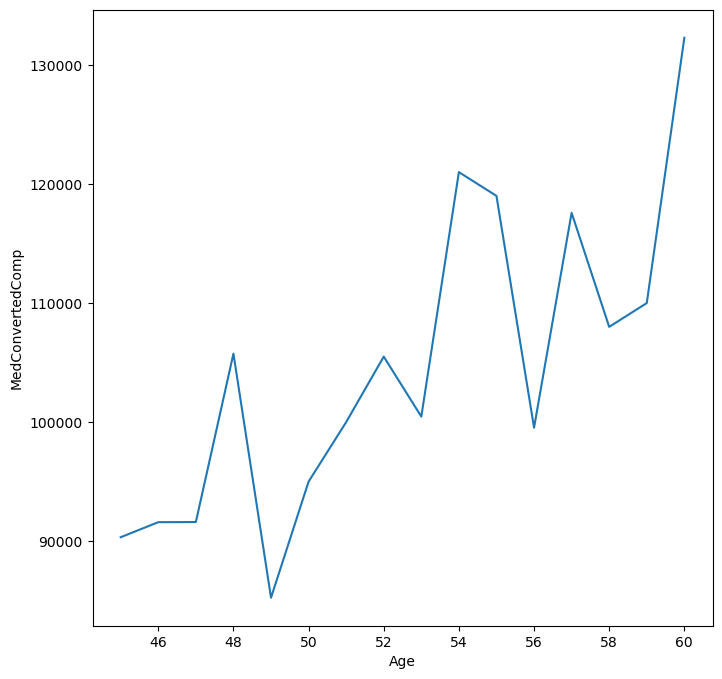

In [31]:
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 45 AND 60

"""
df_line = pd.read_sql_query(QUERY,conn)

medians = df_line.groupby('Age')['ConvertedComp'].median()

data = pd.DataFrame(list(zip(medians.index, medians.values)),
               columns =['Age', 'MedConvertedComp'])

plt.rcParams['figure.figsize'] = [8,8]

sns.lineplot(data=data, x='Age', y = 'MedConvertedComp')

plt.show()

### Bar Chart


Now we create a horizontal bar chart using column `MainBranch.`


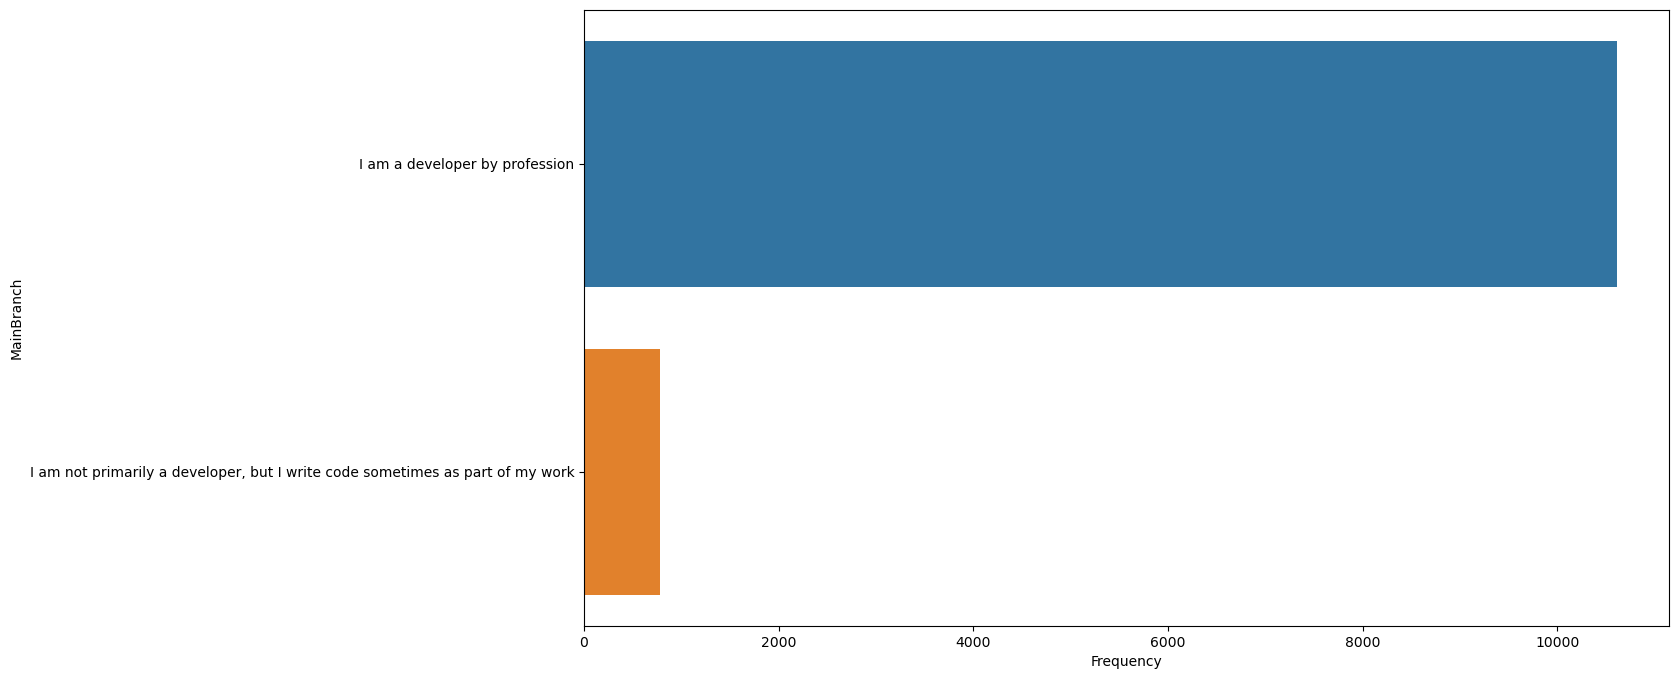

In [39]:
QUERY = """
SELECT MainBranch, COUNT(*) AS Frequency
FROM master
GROUP BY MainBranch

"""
df_barh = pd.read_sql_query(QUERY,conn)

plt.rcParams['figure.figsize'] = [14, 8]

sns.barplot(data = df_barh, y = 'MainBranch', x = 'Frequency', orient = 'h')

plt.show()


Closing the database connection.


In [40]:
conn.close()

 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
